In [1]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt 
import random

E:\AnancondaInstallation\AnacondaInstallation\envs\testenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\AnancondaInstallation\AnacondaInstallation\envs\testenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\AnancondaInstallation\AnacondaInstallation\envs\testenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\A

In [2]:
# b.LOAD THE TRAINING AND TESTING DATA (MNIST) ->
mnist = tf.keras.datasets.mnist                           # Importing MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()    # Splitting it into training and testing data

In [3]:
x_train = x_train / 255
x_test = x_test / 255

In [4]:
# c. DEFINE THE NETWORK ARCHITECTURE USING KERAS ->
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
    ])

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [5]:
# d. TRAIN THE MODEL USING SGD ->
model.compile(optimizer="sgd",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,validation_data=(x_test,y_test),epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.6506 - acc: 0.8369 - val_loss: 0.3565 - val_acc: 0.9007
Epoch 2/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3369 - acc: 0.9065 - val_loss: 0.2984 - val_acc: 0.9171
Epoch 3/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2889 - acc: 0.9187 - val_loss: 0.2630 - val_acc: 0.9266
Epoch 4/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2592 - acc: 0.9268 - val_loss: 0.2405 - val_acc: 0.9330
Epoch 5/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2364 - acc: 0.9340 - val_loss: 0.2223 - val_acc: 0.9372
Epoch 6/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2177 - acc: 0.9393 - val_loss: 0.2067 - val_acc: 0.9412
Epoch 7/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2023 - acc: 0.9433 - val_loss: 0.

In [6]:
# e. EVALUATE THE NETWORK
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f " %test_acc)

10000/10000 [==============================] - 0s 25us/sample - loss: 0.1645 - acc: 0.9528
Loss=0.165
Accuracy=0.953 


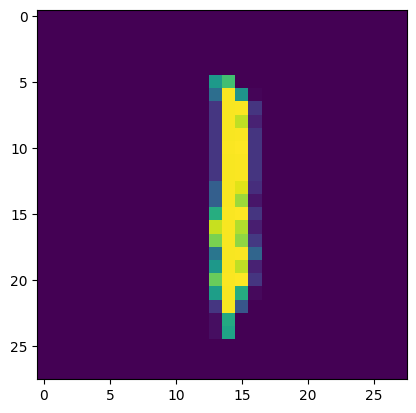

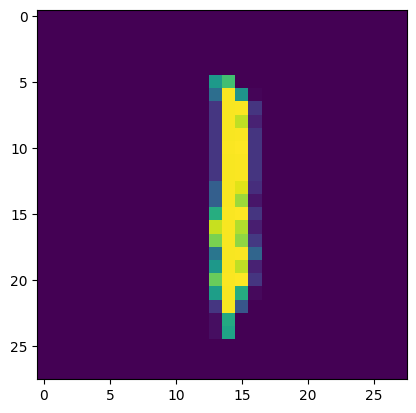

In [7]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()

In [8]:
print('Predicted Value :', predicted_value[n])

Predicted Value : [2.5674620e-07 9.9424100e-01 4.3983752e-04 1.8687417e-03 2.7225915e-05
 1.2673918e-04 4.3376098e-05 2.2798425e-03 2.6129387e-04 7.1177410e-04]


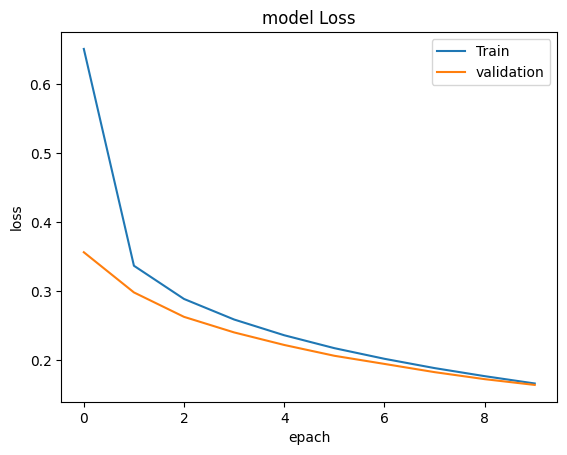

In [9]:
#Plotting the Training Loss :-

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])   
plt.title('model Loss')
plt.ylabel('loss')
plt.xlabel('epach')
plt.legend(['Train', 'validation'], loc='upper right')
plt.show()

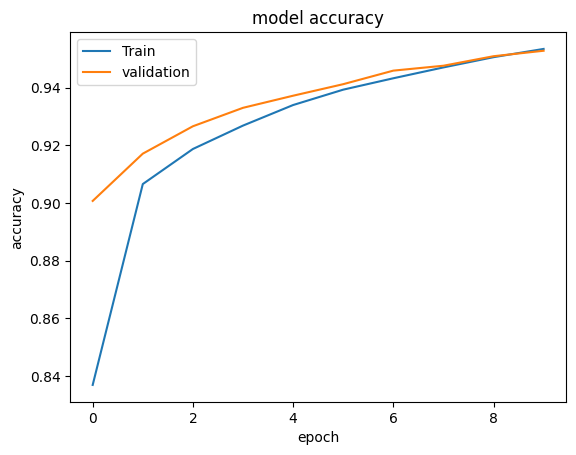

In [13]:
# f. PLOT THE TRAINING LOSS AND ACCURACY ->

   #Plotting the Trainning Accuracy:- 

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'validation'], loc='upper left')  
plt.show()